In [1]:
import pandas as pd
import gtfs_kit as gk
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
feed = gk.feed.read_feed('../general_data_analytics.zip',dist_units="km")

In [3]:
routes = gk.routes.get_routes(feed)
stop_times = feed.get_stop_times()
trips = feed.get_trips()
stops = feed.get_stops()
shapes = feed.shapes
calendar_dates = feed.calendar_dates
calendar = feed.calendar

# Collecting a single week data

## Select trips between Mon 02-Oct-2023 and 08-Oct-2023


In [4]:
## Collecting all service date of trips on those days
sw_calendar_dates = calendar_dates.loc[(calendar_dates['date'] == '20231002') | 
                                    (calendar_dates['date'] == '20231003') |
                                    (calendar_dates['date'] == '20231004') |
                                    (calendar_dates['date'] == '20231005') |
                                    (calendar_dates['date'] == '20231006') |
                                    (calendar_dates['date'] == '20231007') |
                                    (calendar_dates['date'] == '20231008') ]


In [5]:
## Creating new calendar and collect service date from previous new calendar_dates with drop duplicates
sw_calendar = calendar.iloc[0:0]
service_id_list = list(dict.fromkeys( sw_calendar_dates['service_id']))

for service_id in service_id_list:
    row  = calendar.loc[calendar['service_id'] == service_id]
    sw_calendar = pd.concat([sw_calendar, row],
                      ignore_index = True)

In [6]:
## Creating new trips dataframe and collect trips using the list of service id
sw_trips = trips.iloc[0:0]

for service_id in service_id_list:
    row  = trips.loc[trips['service_id'] == service_id]
    sw_trips = pd.concat([sw_trips, row],
                      ignore_index = True)

In [7]:
## Creating list of shapes_id,route_id,trips_id from sw_trips
route_id_list = list(dict.fromkeys(sw_trips['route_id']))
shape_id_list = list(dict.fromkeys(sw_trips['shape_id']))
trip_id_list = list(dict.fromkeys(sw_trips['trip_id']))

In [8]:
## Creating new route dataframe
sw_routes = routes.iloc[0:0]

for route_id in route_id_list:
    row = routes.loc[routes['route_id']==route_id]
    sw_routes = pd.concat([sw_routes,row],ignore_index=True)

In [9]:
## Creating new shape dataframe
sw_shapes = shapes.iloc[0:0]

for shape_id in shape_id_list:
    row = shapes.loc[shapes['shape_id']==shape_id]
    sw_shapes = pd.concat([sw_shapes, row],ignore_index = True)

In [10]:
## Creating new stop_times dataframe
sw_stop_times = stop_times.iloc[0:0]

for trip_id in trip_id_list:
    row = stop_times.loc[stop_times['trip_id'] == trip_id]
    sw_stop_times = pd.concat([sw_stop_times,row],ignore_index = True)

In [11]:
stop_id_list = list(dict.fromkeys(sw_stop_times['stop_id']))

In [12]:
## Creating new stop dataframe, should be equal at this point 
## but we do it for safe reasons
sw_stops = stops.iloc[0:0]

for stop_id in stop_id_list:
    row = stops.loc[stops['stop_id']==stop_id]
    sw_stops = pd.concat([sw_stops,row],ignore_index = True)


In [13]:
# Check value change
subtracted_dimensions = pd.DataFrame(columns=["Name","Initial","Updated","Difference"])


res = tuple(map(lambda i, j: i - j, routes.shape, sw_routes.shape))
subtracted_dimensions.loc[0] = ["Routes",routes.shape, sw_routes.shape, res]

res = tuple(map(lambda i, j: i - j, stops.shape, sw_stops.shape))
subtracted_dimensions.loc[1] = ["Stops",stops.shape, sw_stops.shape, res]

res = tuple(map(lambda i, j: i - j, trips.shape, sw_trips.shape))
subtracted_dimensions.loc[2] = ["Trips",trips.shape, sw_trips.shape, res]

res = tuple(map(lambda i, j: i - j, stop_times.shape,sw_stop_times.shape))
subtracted_dimensions.loc[3] = ["Stop_Times",stop_times.shape, sw_stop_times.shape, res]

#Shape superflue
# TODO
# TODO
# TODO
res = tuple(map(lambda i, j: i - j, shapes.shape, sw_shapes.shape))
subtracted_dimensions.loc[4] = ["Shapes",shapes.shape, sw_shapes.shape, res]

res = tuple(map(lambda i, j: i - j, calendar.shape, sw_calendar.shape))
subtracted_dimensions.loc[5] = ["Calendar",calendar.shape, sw_calendar.shape, res]

res = tuple(map(lambda i, j: i - j, calendar_dates.shape, sw_calendar_dates.shape))
subtracted_dimensions.loc[6] = ["Calendar_Dates",calendar_dates.shape, sw_calendar_dates.shape, res]

subtracted_dimensions

,Name,Initial,Updated,Difference
0,Routes,"(3, 7)","(1, 7)","(2, 0)"
1,Stops,"(28, 6)","(28, 6)","(0, 0)"
2,Trips,"(1149, 7)","(70, 7)","(1079, 0)"
3,Stop_Times,"(12497, 10)","(893, 10)","(11604, 0)"
4,Shapes,"(96692, 6)","(54038, 6)","(42654, 0)"
5,Calendar,"(201, 10)","(18, 10)","(183, 0)"
6,Calendar_Dates,"(28260, 2)","(84, 2)","(28176, 0)"


### General Statistics on single week

In [14]:
# Join the dataset for easy at use
df_analytics = trips
df_analytics = pd.merge(df_analytics, sw_routes, on=['route_id','route_id'])
df_analytics = pd.merge(df_analytics, sw_stop_times, on=['trip_id','trip_id'])
df_analytics = pd.merge(df_analytics, sw_stops, on=['stop_id','stop_id'])

In [15]:
# Basic statistics on the number of stops
print("Mean of stop_sequence : " + str(df_analytics.stop_sequence.mean()))
print('-' * 50)
print("Median of stop_sequence : " + str(df_analytics.stop_sequence.median()))
print('-' * 50)
print("Standard Deviation of stop_sequence : " + str(df_analytics.stop_sequence.std()))
print('-' * 50)
print("Skewness of stop_sequence : " + str(df_analytics.stop_sequence.skew()))

Mean of stop_sequence : 9.366181410974244
--------------------------------------------------
Median of stop_sequence : 8.0
--------------------------------------------------
Standard Deviation of stop_sequence : 6.696768067844153
--------------------------------------------------
Skewness of stop_sequence : 0.6332155393796917


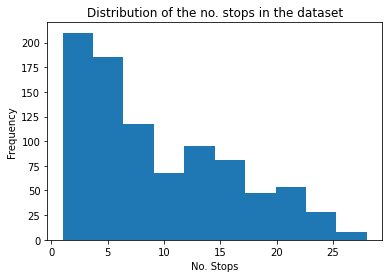

In [16]:
# Distribution of number of stops in the dataset
plt.title('Distribution of the no. stops in the dataset')
plt.hist(df_analytics.stop_sequence)
plt.xlabel('No. Stops')
plt.ylabel('Frequency')
plt.show()

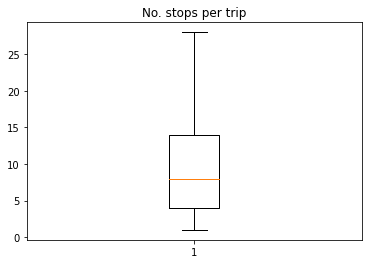

In [17]:
# Number of stops per trip
plt.boxplot(df_analytics.stop_sequence)

plt.title('No. stops per trip')
plt.show()

1- Densità elevata solo stop -> 
tanti treni in un periodo orario 
che si susseguono ed hanno un numero di fermate medio alte.

In [18]:
print("N. on monday trips " + str(sum(sw_calendar['monday'])))
print("N. on tuesday trips " + str(sum(sw_calendar['tuesday'])))
print("N. on wednesday trips " + str(sum(sw_calendar['wednesday'])))
print("N. on thursday trips " + str(sum(sw_calendar['thursday'])))
print("N. on friday trips " + str(sum(sw_calendar['friday'])))
print("N. on saturday trips " + str(sum(sw_calendar['saturday'])))
print("N. on sunday trips " + str(sum(sw_calendar['sunday'])))

N. on monday trips 16
N. on tuesday trips 13
N. on wednesday trips 13
N. on thursday trips 13
N. on friday trips 16
N. on saturday trips 12
N. on sunday trips 7


In [19]:
sw_calendar.drop(sw_calendar[sw_calendar['monday'] <= 0].index, inplace = True)
monday_service_id = list(sw_calendar['service_id'])

In [20]:
## Creating new trips dataframe and collect trips using the list of service id
monday_trips = trips.iloc[0:0]

for service_id in monday_service_id:
    rows  = sw_trips.loc[sw_trips['service_id'] == service_id]
    monday_trips = pd.concat([monday_trips, rows],
                      ignore_index = True)
    
monday_trip_id = list(monday_trips['trip_id'])

In [21]:
# We choose the train between 07:00 and 10:00 
lower_time = '07:00:00'
higher_time = '10:00:00'
monday_stop_times = sw_stop_times.iloc[0:0]

sw_stop_times = sw_stop_times.loc[((sw_stop_times['arrival_time'] >= lower_time) &
                                  (sw_stop_times['arrival_time'] <= higher_time))| (
                                  (sw_stop_times['departure_time'] >= lower_time) &
                                  (sw_stop_times['departure_time'] <= higher_time))]

trips_between_bounds = list(dict.fromkeys(sw_stop_times['trip_id']))

sw_monday_trips = trips.iloc[0:0]

for trip_id in trips_between_bounds:
    temp_trips = monday_trips.loc[monday_trips['trip_id'] == trip_id]
    sw_monday_trips = pd.concat([sw_monday_trips, temp_trips], ignore_index = True)

In [22]:
# Generate usefull info